**Title: Preprocessing collected sensor data**<br><br>
**Description:** This code aims to create a single larger database from sensor data collected from Arduino, smartphone, and PiksiRTK system. Typically, the sensor data is stored in separate CSV files, which makes it challenging to process and analyze the data efficiently. This code seeks to solve this problem by creating a single mega-database that contains all the relevant data.<br>
To achieve this, the code requires the user to input the path of the individual CSV files containing sensor data. Once the input is provided, the code executes the necessary steps to merge the data into a single file. Individual databases are merged together based on the common timestamps. Steps involved during the dataprocessing of each sensor dataset is explained in the individual section.<br><br>
**Author:** Akshay Laxman Powar<br>
**Date:** 29.03.2023<br>

In [1]:
# Import necessary liabraries
import pandas as pd
from datetime import datetime, timedelta
import math
import numpy as np
import matplotlib.pyplot as plt
import os 

In [2]:
# Enter Inputs here
arduino_input_file = "../data_collection/Trial3/Arduino/GPSLOG4.csv"
smartphone_input_file = "../data_collection/Trial3/SmartPhone/gp6_path4_14042023.csv"
piksi_input_file = "../data_collection/Trial3/PiksiRTK/path4_1404023.csv"
megadatabase_output_file = 'megadatabase_L_shaped_traj.csv'

In [3]:
os.getcwd()

'C:\\Users\\Z0168020\\Documents\\Sort Arduino Data by Time Stamps'

### Preprocessing Arduino Data
#### This involves the following steps-
**Step 1-** Read data from csv and store it in different variables<br>
**Step 2-** Convert timestamps gps stored in string format into datetime format<br>
**Step 3-** Concatenate timestamps with the location data from gps after length check<br>
**Step 4-** Check the datatypes of all three datasets to ensure they are in the correct format for further analysis<br>

In [4]:
# Step 1- Read data from csv and store it in different variables
exclude_columns = ["Altitude"]
dfarduino = pd.read_csv(arduino_input_file, usecols=lambda column: column not in exclude_columns)
dfarduino["RPM"] /=10 

# Grouping the data as per different gps sensors
dfarduinogps1 = dfarduino[dfarduino["GPS"].values == "GPS1"].reset_index()
dfarduinogps2 = dfarduino[dfarduino["GPS"].values == "GPS2"].reset_index()
dfarduinogps3 = dfarduino[dfarduino["GPS"].values == "GPS3"].reset_index()

# Step 2- Convert timestamps gps stored in string format into datetime format 
'''first convert to dtype ==> dtype('<M8[ns]') this is done for compatibility with sensor datasets
then convert to dtype ==>  dtype(datetime64[ns])'''
newTS_GPS1 = pd.to_datetime(pd.to_datetime(dfarduinogps1["Date"] + " " + dfarduinogps1["Time"]))
newTS_GPS2 = pd.to_datetime(pd.to_datetime( dfarduinogps2["Date"] + " " +  dfarduinogps2["Time"]))
newTS_GPS3 = pd.to_datetime(pd.to_datetime(dfarduinogps3["Date"] + " " +  dfarduinogps3["Time"]))

# Step 3- Concatenate timestamps with the location data from gps after length check
if len(newTS_GPS1) == len(dfarduinogps1) and len(newTS_GPS2) == len(dfarduinogps2) and len(newTS_GPS3) == len(dfarduinogps3):
    new_dfGPS1 = pd.concat([pd.DataFrame({'TimeStamps': newTS_GPS1}),dfarduinogps1.loc[:, ['Latitude', 'Longitude','RPM']]], axis=1)
    new_dfGPS2 = pd.concat([pd.DataFrame({'TimeStamps': newTS_GPS2}),dfarduinogps2.loc[:, ['Latitude', 'Longitude','RPM']]], axis=1)
    new_dfGPS3 = pd.concat([pd.DataFrame({'TimeStamps': newTS_GPS3}),dfarduinogps3.loc[:, ['Latitude', 'Longitude','RPM']]], axis=1)
    print("data lengths are same, timestampes concatenated with respective sensor location data.")
else:
    print("data lengths are not same")

# Step 4- Check the datatypes of all three datasets to ensure they are in the correct format for further analysis
if ((new_dfGPS1.dtypes == new_dfGPS2.dtypes).all() and (new_dfGPS1.dtypes == new_dfGPS3.dtypes).all()):
    print(new_dfGPS1.dtypes)
    print("Sucess! Now arduino datasets can be used for subsequent analysis.")
else:
    print("Warning! datatypes are not same")

data lengths are same, timestampes concatenated with respective sensor location data.
TimeStamps    datetime64[ns]
Latitude             float64
Longitude            float64
RPM                  float64
dtype: object
Sucess! Now arduino datasets can be used for subsequent analysis.


### Preprocessing Smartphone Data
#### This involves the following steps-
**Step 1-** Read data from csv<br>
**Step 2-** Convert timestamps gps stored in string format into datetime format and Subtract 2 hours from timestamps for synchronization<br>
**Step 3-** Concatenate timestamps with the location data from gps after length check<br>
**Step 4-** Rename columns and Check the datatypes dataset to ensure it is in the correct format for further analysis<br>

In [5]:
# Step 1- Read data from csv
dfsmartphone = pd.read_csv(smartphone_input_file,usecols =[1,2,3], header=None)

# Step 2- Convert timestamps gps stored in string format into datetime format and Subtract 2 hours from timestamps for synchronization
newTS_Smartphone  = pd.to_datetime(dfarduino["Date"][5] + " " + dfsmartphone[1].str[:-2] + "00") - timedelta(hours=2)

#Step 3- Concatenate timestamps with the location data from gps after length check
if len(newTS_Smartphone) == len(dfsmartphone):
    new_dfSmartphone = pd.concat([newTS_Smartphone,dfsmartphone.loc[:, [2, 3]]], axis=1)
    print("data lengths are same, timestampes concatenated with respective sensor location data.")
else:
    print("data lengths are not same")
    
#Step 4- Rename columns and Check the datatypes dataset to ensure it is in the correct format for further analysis
new_dfSmartphone.rename(columns={1:'TimeStamps', 2:'Latitude',3:'Longitude'}, inplace = True)

if ((new_dfGPS1.iloc[:, :3].dtypes == new_dfSmartphone.iloc[:, :3].dtypes).all()):
    print(new_dfSmartphone.dtypes)
    print("Sucess! Now smartphone dataset can be used for subsequent analysis.")
else:
    print("Warning! datatypes are not same")

data lengths are same, timestampes concatenated with respective sensor location data.
TimeStamps    datetime64[ns]
Latitude             float64
Longitude            float64
dtype: object
Sucess! Now smartphone dataset can be used for subsequent analysis.


### Preprocessing Piksi Data 
#### This involves the following steps-
**Step 1-** Read data from csv<br>
**Step 2-** Combining columns to create timestamps of gps and convert from string format into datetime format<br>
**Step 3-** Concatenate timestamps with the location data from gps after length check<br>
**Step 4-** Rename columns and Check the datatypes dataset to ensure it is in the correct format for further analysis<br>

In [17]:
# Step 1- Read data from csv
dfpiksirtk =pd.read_csv(piksi_input_file, header=None)

# Step 2- Combining columns to create timestamps of gps and convert from string format into datetime format

# Converting nanoseconds to milliseconds using lamda fnction
piksi_lambda = lambda s: s[:-10] if len(s) > 6 else '0' if len(s) == 3 else s
millis_list = list(map(piksi_lambda, dfpiksirtk[6].astype(str)))

indices = [6, 16, 26, 36, 46, 56, 66]
for index in indices:
    millis_list[index] = ''

# conversion from string to datetime
newTS_piksi = pd.to_datetime(dfpiksirtk[0].astype(str).str[:-2] + "-" + dfpiksirtk[1].astype(str).str[:-2] + 
                            "-" +dfpiksirtk[2].astype(str).str[:-2] + " " + dfpiksirtk[3].astype(str).str[:-2] +
                            ":"+ dfpiksirtk[4].astype(str).str[:-2] + ":" +dfpiksirtk[5].astype(str).str[:-2] + "."+ millis_list)

#Step 3- Concatenate timestamps with the location data from gps after length check
if len(newTS_piksi) == len(dfpiksirtk):
    new_dfpiksirtk = pd.concat([newTS_piksi,dfpiksirtk.loc[:, [7, 8]]], axis=1)
    print("data lengths are same, timestampes concatenated with respective sensor location data.")
else:
    print("data lengths are not same")
    
#Step 4- Rename columns and Check the datatypes dataset to ensure it is in the correct format for further analysis
new_dfpiksirtk.rename(columns={0:'TimeStamps', 7:'Latitude',8:'Longitude'}, inplace = True)

if ((new_dfGPS1.iloc[:, :3].dtypes == new_dfSmartphone.iloc[:, :3].dtypes).all() and (new_dfGPS1.iloc[:, :3].dtypes == new_dfpiksirtk.iloc[:, :3].dtypes).all()):
    print(new_dfpiksirtk.dtypes)
    print("Sucess! Now Piksi dataset can be used for subsequent analysis.")
else:
    print("Warning! datatypes are not same")

data lengths are same, timestampes concatenated with respective sensor location data.
TimeStamps    datetime64[ns]
Latitude             float64
Longitude            float64
dtype: object
Sucess! Now Piksi dataset can be used for subsequent analysis.


# conversion from string to datetime
newTS_piksi = pd.to_datetime(dfpiksirtk[0].astype(str).str[:-2] + "-" + dfpiksirtk[1].astype(str).str[:-2] + 
                            "-" +dfpiksirtk[2].astype(str).str[:-2] + " " + dfpiksirtk[3].astype(str).str[:-2] +
                            ":"+ dfpiksirtk[4].astype(str).str[:-2] + ":" +dfpiksirtk[5].astype(str).str[:-2] + "."+ millis_list)

#Step 3- Concatenate timestamps with the location data from gps after length check
if len(newTS_piksi) == len(dfpiksirtk):
    new_dfpiksirtk = pd.concat([newTS_piksi,dfpiksirtk.loc[:, [7, 8]]], axis=1)
    print("data lengths are same, timestampes concatenated with respective sensor location data.")
else:
    print("data lengths are not same")
    
#Step 4- Rename columns and Check the datatypes dataset to ensure it is in the correct format for further analysis
new_dfpiksirtk.rename(columns={0:'TimeStamps', 7:'Latitude',8:'Longitude'}, inplace = True)

if ((new_dfGPS1.dtypes == new_dfSmartphone.dtypes).all() and (new_dfGPS1.dtypes == new_dfpiksirtk.dtypes).all()):
    print(new_dfpiksirtk.dtypes)
    print("Sucess! Now Piksi dataset can be used for subsequent analysis.")
else:
    print("Warning! datatypes are not same")

## Creating Megadatabase
All checked now data ready to get mergerd into single reference database. First thing to do is Renaming the columns in order to perform the column joins. Columns names previously not set different because in order to do the datatype check it is required to have the same column sname. Left joins will be utilized to ensure that no data is missed during the merging process. Once the merging is complete, any duplicate data will be removed from the megadataset. Finally, the file will be saved to the desired destination.

In [18]:
# Rename Columns
new_dfGPS1.rename(columns={'Latitude':'lat_GPS1','Longitude':'lon_GPS1'}, inplace = True)
new_dfGPS2.rename(columns={'Latitude':'lat_GPS2','Longitude':'lon_GPS2'}, inplace = True)
new_dfGPS3.rename(columns={'Latitude':'lat_GPS3','Longitude':'lon_GPS3'}, inplace = True)
new_dfSmartphone.rename(columns={'Latitude':'lat_smartphone','Longitude':'lon_smartphone'}, inplace = True)
new_dfpiksirtk.rename(columns={'Latitude':'lat_piksi','Longitude':'lon_piksi'}, inplace = True)

# Merge Datasets
merged_df = pd.merge(new_dfpiksirtk, new_dfSmartphone, on='TimeStamps', how='left')
merged_df = pd.merge(merged_df, new_dfGPS1, on='TimeStamps', how='left')
merged_df = pd.merge(merged_df, new_dfGPS2, on='TimeStamps', how='left')
megadatabase = pd.merge(merged_df, new_dfGPS3, on='TimeStamps', how='left')

# Remove Duplicates
megadatabase_final = megadatabase.drop_duplicates()

# Save data in csv file
output_file_path = os.path.join('C:', os.sep, 'Users', 'Z0168020', 'Documents', 'Sort Arduino Data by Time Stamps', megadatabase_output_file)
megadatabase_final.to_csv(output_file_path, index=False, header=True)

## Creating New database 
Piksi database has 10 readings per second and smartphone and Arduino has only 1 reading per seconds so for plotting the RMSE we have to filter out the excesive number of readings

In [ ]:
rmse_merge1 = pd.merge(new_dfpiksirtk, new_dfSmartphone, on='TimeStamps', how='inner')
lat_lon_piksi = [rmse_merge1['lat_piksi'], rmse_merge1['lon_piksi']]

lat_lon_smartphone = [rmse_merge1['lat_smartphone'], rmse_merge1['lon_smartphone']]
 
MSE_piksi_smartphone = np.square(np.subtract(lat_lon_piksi, lat_lon_smartphone)).mean(axis=1)
 
RMSE_piksi_smartphone = np.sqrt(MSE_piksi_smartphone)
RMSE_piksi_smartphone


In [ ]:
rmse_merge21 = pd.merge(new_dfpiksirtk, new_dfGPS1, on='TimeStamps', how='inner')
lat_lon_piksi = [rmse_merge21['lat_piksi'], rmse_merge21['lon_piksi']]
long_lat_gps1 = [rmse_merge21['lat_GPS1'], rmse_merge21['lon_GPS1']]
 
MSE_piksi_gps1 = np.square(np.subtract(lat_lon_piksi, long_lat_gps1)).mean(axis=1)
 
RMSE_piksi_gps1 = np.sqrt(MSE_piksi_gps1)
RMSE_piksi_gps1

In [ ]:
rmse_merge22 = pd.merge(new_dfpiksirtk, new_dfGPS2, on='TimeStamps', how='inner')
lat_lon_piksi = [rmse_merge22['lat_piksi'], rmse_merge22['lon_piksi']]
long_lat_gps2 = [rmse_merge22['lat_GPS2'], rmse_merge22['lon_GPS2']]
 
MSE_piksi_gps2 = np.square(np.subtract(lat_lon_piksi, long_lat_gps2)).mean(axis=1)
 
RMSE_piksi_gps2 = np.sqrt(MSE_piksi_gps2)
RMSE_piksi_gps2

In [ ]:
rmse_merge23 = pd.merge(new_dfpiksirtk, new_dfGPS3, on='TimeStamps', how='inner')
lat_lon_piksi = [rmse_merge23['lat_piksi'], rmse_merge23['lon_piksi']]
long_lat_gps3 = [rmse_merge23['lat_GPS3'], rmse_merge23['lon_GPS3']]
 
MSE_piksi_gps3 = np.square(np.subtract(lat_lon_piksi, long_lat_gps3)).mean(axis=1)
 
RMSE_piksi_gps3 = np.sqrt(MSE_piksi_gps3)
RMSE_piksi_gps3


In [ ]:
rmse = np.array([RMSE_piksi_smartphone, RMSE_piksi_gps1, RMSE_piksi_gps2, RMSE_piksi_gps3])
rmse

In [ ]:
# Create a list of sensor names and RMSE values
sensors = ['Smartphone','GPS1', 'GPS2', 'GPS3']
rmse_values_lat = [rmse[0][0], rmse[1][0], rmse[2][0],rmse[3][0]]

# Plot the RMSE values
plt.bar(sensors, rmse_values_lat)
plt.title('RMSE values Latitude')
plt.xlabel('Sensors')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Create a list of sensor names and RMSE values
sensors = ['Smartphone','GPS1', 'GPS2', 'GPS3']
rmse_values_lon = [rmse[0][1], rmse[1][1], rmse[2][1],rmse[3][1]]

# Plot the RMSE values
plt.bar(sensors, rmse_values_lon)
plt.title('RMSE values Longitude')
plt.xlabel('Sensors')
plt.ylabel('RMSE')
plt.show()

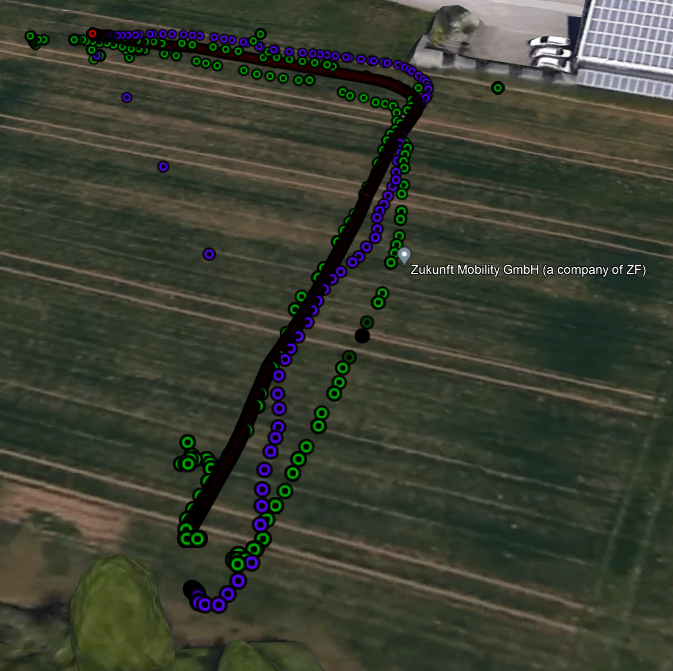

In [ ]:
lat_lon_piksi = [rmse_f['lat_piksi'], rmse_f['lon_piksi']]

lat_lon_smartphone = [rmse_f['lat_smartphone'], rmse_f['lon_smartphone']]
long_lat_gps1 = [rmse_f['lat_GPS1'], rmse_f['lon_GPS1']]
long_lat_gps2 = [rmse_f['lat_GPS2'], rmse_f['lon_GPS2']]
long_lat_gps3 = [rmse_f['lat_GPS3'], rmse_f['lon_GPS3']]

MSE_piksi_smartphone = np.square(np.subtract(lat_lon_piksi, lat_lon_smartphone)).mean(axis=1)
MSE_piksi_gps1 = np.square(np.subtract(lat_lon_piksi, long_lat_gps1)).mean(axis=1)
MSE_piksi_gps2 = np.square(np.subtract(lat_lon_piksi, long_lat_gps2)).mean(axis=1)
MSE_piksi_gps3 = np.square(np.subtract(lat_lon_piksi, long_lat_gps3)).mean(axis=1)
 
RMSE_piksi_smartphone = np.sqrt(MSE_piksi_smartphone)
RMSE_piksi_gps1 = np.sqrt(MSE_piksi_gps1)
RMSE_piksi_gps2 = np.sqrt(MSE_piksi_gps2)
RMSE_piksi_gps3 = np.sqrt(MSE_piksi_gps3)

In [ ]:
rmse = np.array([RMSE_piksi_smartphone, RMSE_piksi_gps1, RMSE_piksi_gps2, RMSE_piksi_gps3])
rmse

In [ ]:
# Create a list of sensor names and RMSE values
sensors = ['Smartphone','GPS1', 'GPS2', 'GPS3']
rmse_values_lat = [rmse[0][0], rmse[1][0], rmse[2][0],rmse[3][0]]

# Plot the RMSE values
plt.bar(sensors, rmse_values_lat)
plt.title('RMSE values Latitude')
plt.xlabel('Sensors')
plt.ylabel('RMSE')
plt.show()

In [ ]:
# Create a list of sensor names and RMSE values
sensors = ['Smartphone','GPS1', 'GPS2', 'GPS3']
rmse_values_lon = [rmse[0][1], rmse[1][1], rmse[2][1],rmse[3][1]]

# Plot the RMSE values
plt.bar(sensors, rmse_values_lon)
plt.title('RMSE values Longitude')
plt.xlabel('Sensors')
plt.ylabel('RMSE')
plt.show()